<a href="https://colab.research.google.com/github/ankitrijal2054/CPSMA-441301/blob/main/Integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Module 7: Integration



$Ankit Rijal$

$Min Sun Kim$

$Tylar Gifford$

$CPSMA - 441301$

$Dr. Nicolas Jacob$

First, I am going to import necessary package for this project.

In [ ]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import math

For this project, we will be using our original function from project 1. i.e.
$$
f(x) = e^x
$$
The, Let's graph the function:

Text(0.5, 1.0, 'Function $e^x$')

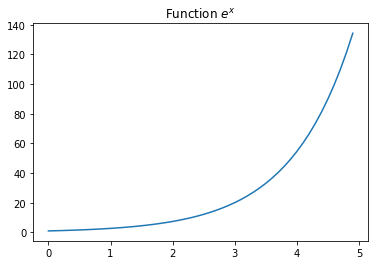

In [ ]:
x = np.arange( 0,5,.1)
plt.plot(x,np.e**x)
plt.title("Function $e^x$")

Now, using method from calculus, let's calculate the are under the curve 1 and 4 by hand.
$$
\begin{align}
Area &= \int_1^4 e^x \ dx\\
&= e^x\vert_1^4\\
&= e^4-e^1\\
&= 51.87986 
\end{align}
$$
So, Let's check our answer using pthon builtin integration function.

In [ ]:
actual_value = integrate.quad(np.exp ,1,4)[0]
print(actual_value)

51.879868204685195


In [ ]:
#function to compute error
def error(estimate_value):
  error = (actual_value - estimate_value)/estimate_value
  return abs(error)*100

##Riemann Sum

The Reimann sum is a calculation of the actual area underneath the graph of a curve f(x) which is resulted by dividing it into multiple shapes like rectangles. 

Below, I am going to define some functions. 

$$
\sum_{i=1}^n f(x_{i-1})\Delta x
$$

$$
\sum_{i=1}^n f(x_{i})\Delta x
$$

$$
\sum_{i=1}^n f(\frac{x_{i}+x_{i-1}}2)\Delta x
$$

In [ ]:
def delx(a,b,n):
  return (b-a)/n

def riemannSum(function,a,b,n,endpoint):
  dx = delx(a,b,n)
  if endpoint == 'left':
    start = 0
  elif endpoint == 'right':
    start = 1
  elif endpoint == 'mid':
    start = 0.5
  rSum = 0
  for i in np.arange(start,n+start):
    rSum += function(a + i*dx)*dx
  return rSum

Now, let's calculate the riemann sum using the above functions.

In [ ]:
riemannSum(np.exp, 1, 4, 10, 'left')

44.486404584868005

Text(0.5, 1.0, 'Left')

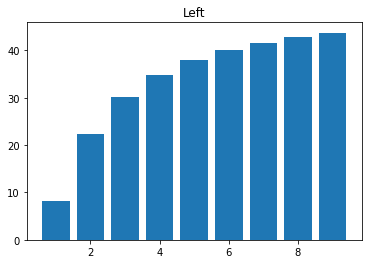

In [ ]:
no_of_rectangle = [i for i in range(1,10,1)]
estimate_value = [riemannSum(np.exp, 1, 4, i, 'left') for i in range(1,10,1)]

plt.bar(no_of_rectangle, estimate_value)

plt.title("Left Endpoint")

In [ ]:
riemannSum(np.exp, 1, 4, 10, 'right')

60.050365046273555

Text(0.5, 1.0, 'Mid')

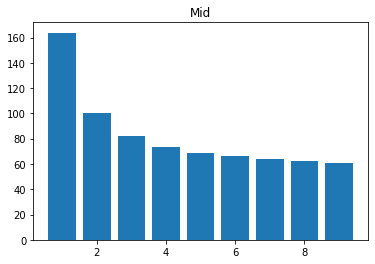

In [ ]:
no_of_rectangle = [i for i in range(1,10,1)]
estimate_value = [riemannSum(np.exp, 1, 4, i, 'right') for i in range(1,10,1)]

plt.bar(no_of_rectangle, estimate_value)

plt.title("Midpoint")

In [ ]:
riemannSum(np.exp, 1, 4, 10, 'mid')

51.68582818256414

Text(0.5, 1.0, 'right')

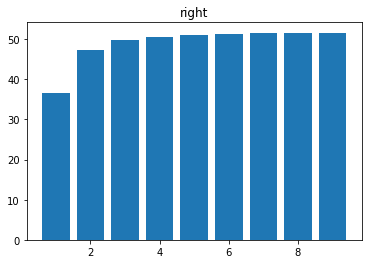

In [ ]:
no_of_rectangle = [i for i in range(1,10,1)]
estimate_value = [riemannSum(np.exp, 1, 4, i, 'mid') for i in range(1,10,1)]

plt.bar(no_of_rectangle, estimate_value)

plt.title("Right Endpoint")

Let's compute the error for mid riemann sum using different number of rectangle.

In [ ]:
no_of_rectangle = [i for i in range(5,55,5)]
actual_value_list = [integrate.quad(np.exp ,1,4)[0] for i in range(5,55,5)]
estimate_value = [riemannSum(np.exp, 1, 4, i, 'mid') for i in range(5,55,5)]
error_percentage = [error(est) for est in estimate_value]

In [ ]:
import plotly.graph_objects as go
fig = go.Figure(data=[go.Table(
    header=dict(values=['No of Rectangle', 'Actual Value', 'Estimated Value','Percentage Error'],
                line_color='darkslategray',
                fill_color='lightgreen',
                align='left'),
    cells=dict(values=[no_of_rectangle, actual_value_list, estimate_value, error_percentage], 
               line_color='darkslategray',
               fill_color='white',
               align='left'))
])

fig.update_layout(width=1500, height=800)
fig.show()

From the above table, we can conclude that, the more number of rectangle we use, the more accurate value we get. 

## Trapazoid Rule

Trapezoid Rule is a form of Riemann's Summs, but it uses trapezoids not rectangles. And it uses the average between points to approximate the line that the graph makes between the two points.

$$
\int_a^b f(x)\ dx
\approx  
\
(b-a)*\frac{f(a)+f(b)}2
\
$$

I am going to write required function for the trapazoid rule. 

In [ ]:
def trapazoid (function, a, b, n):
  dx = delx(a,b,n)
  sum = 0
  for i in range(1,n):
    sum += 2*function(a+i*dx)

  sum = (dx/2)*(sum +function(a)+function(b))
  return sum



In [ ]:
trap_sum = trapazoid(np.exp, 1 , 4, 10)
print(trap_sum)

52.26838481557078


In [ ]:
print(f"Percentage error = {error(trap_sum)}")

Percentage error = 0.7433109177880106
